# 2 Linear regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
products and populations from the cities.

You would like to use this data to help you select which city to expand
to next.
The file ex1data1.txt contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [309]:
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

# 2.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can't be plotted on a 2-d plot.)
In ex1.m, the dataset is loaded from the data le into the variables X
and y:

In [310]:
data = genfromtxt('ex1data1.txt', delimiter=',')   # read comma separated data
data = np.asmatrix(data)
X = data[:, 0]; y = data[:, 1];
m = len(y);                     # number of training examples

Next, the script calls the plotData function to create a scatter plot of
the data. Your job is to complete plotData.m to draw the plot; modify the
file and fill in the following code:

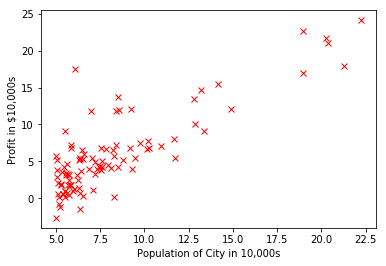

In [311]:
%matplotlib inline
fig = plt.figure()
plt.plot(X, y, 'rx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset
using gradient descent.

## 2.2.1 Update Equations
The objective of linear regression is to minimize the cost function
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model

$$h\theta(x) = \theta^{T}x = \theta_0 + \theta_1x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update 

$$ \theta_j := \theta_j-\alpha\frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)} $$ (simultaneously update $\theta_j$ for all j):

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

# 2.2.2 Implementation
In ex1.m, we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [312]:
X = np.c_[np.ones((m, 1)), data[:,0]];      # Add a column of ones to x
theta = np.zeros((2, 1));                   # initialize fitting parameters
iterations = 1500;
alpha = 0.01;

# 2.2.3 Computing the cost $J(\theta)$
As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

Your next task is to complete the code, which is a function that computes $J(\theta)$. As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.

Once you have completed the function, the next step in ex1.m will run computeCost once using $\theta$ initialized to zeros, and you will see the cost printed to the screen. 

You should expect to see a cost of 32.07.

In [313]:
def computeCost(X, y, theta):
    #COMPUTECOST Compute cost for linear regression
    #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = len(y); # number of training examples

    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    J = sum(np.square((np.matmul(X, theta) - y)))/2/m
    # =========================================================================

    return J

In [314]:
print('\nTesting the cost function ...\n')
# compute and display initial cost
J = computeCost(X, y, theta);
print('With theta = [0 ; 0]\nCost computed = %f\n' % J);
print('Expected cost value (approx) 32.07\n')


Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 32.072734

Expected cost value (approx) 32.07



## 2.2.4 Gradient descent
Next, you will implement gradient descent.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration.
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not X and y. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing X or y. Refer to the equations in this handout and to the video lectures if you are uncertain.  

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. The starter code for gradientDescent.m calls computeCost on every iteration and prints the cost. Assuming you have implemented gradient descent and computeCost correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm. After you are finished, use your final parameters to plot the
linear fit. The result should look something like Figure 2:

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people. Note the way that the following lines uses matrix multiplication, rather than explicit summation or looping, to calculate the predictions. 

In [315]:
def gradientDescent(X, y, theta, alpha, num_iters):
#GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha

# Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - y)
        # Save the cost J in every iteration    
        J_history[i] = computeCost(X, y, theta)

    return (theta, J_history)


With theta = [-1 ; 2]
Cost computed = 54.242455

Expected cost value (approx) 54.24


Running Gradient Descent ...

Theta found by gradient descent:

[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




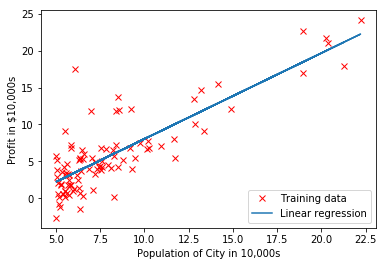

In [316]:
# further testing of the cost function
J = computeCost(X, y, np.array([[-1],[2]]))
print('\nWith theta = [-1 ; 2]\nCost computed = %f\n' % J)
print('Expected cost value (approx) 54.24\n')

print('\nRunning Gradient Descent ...\n')
# run gradient descent
(theta, J_history) = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent:\n');
print(theta)
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');

# Plot the linear fit
plt.plot(X[:,1], y, 'rx', label='Training data')
plt.plot(X[:,1], np.matmul(X, theta), '-' , label='Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')

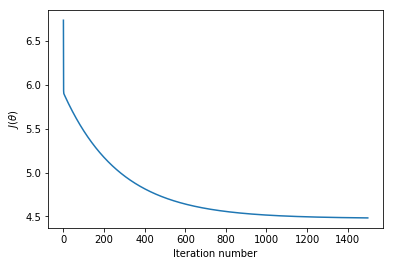

In [317]:
# Plot cost function vs. iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$')

In [318]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
print('For population = 35,000, we predict a profit of %f\n' % (predict1*10000));
predict2 = [1, 7] * theta;
print('For population = 70,000, we predict a profit of %f\n' % (predict2*10000));

For population = 35,000, we predict a profit of 4519.767868

For population = 70,000, we predict a profit of 45342.450129



# 2.4 Visualizing $J(\theta)$
To understand the cost function J() better, you will now plot the cost over
a 2-dimensional grid of 0 and 1 values. You will not need to code anything
new for this part, but you should understand how the code you have written
already is creating these images.
In the next step of ex1.m, there is code set up to calculate J() over a
grid of values using the computeCost function that you wrote.

In [319]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J values
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# fill in J values
for ii, t0 in enumerate(theta0_vals):
    for jj, t1 in enumerate(theta1_vals):
        t = np.array([[t0], [t1]])
        J_vals[ii,jj] = computeCost(X, y, t)

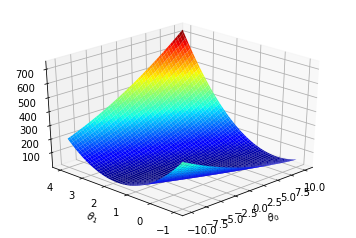

In [320]:
# make Surface plot
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

surf = ax.plot_surface(T0, T1, J_vals.T, cmap='jet', rstride=2, 
                       cstride=2, antialiased=True)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

ax.view_init(30, 225)
plt.draw()

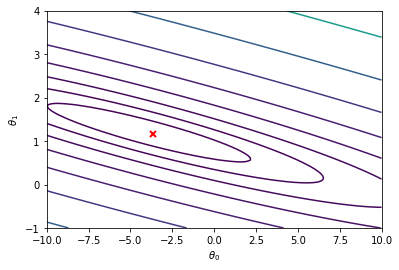

In [321]:
# make contour plot
plt.contour(T0, T1, J_vals.T, np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'x', color='r', mew=2)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

The purpose of these graphs is to show you that how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for  $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

# 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

# 3.1 Feature Normalization
The below line will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to
* Subtract the mean value of each feature from the dataset.
* After subtracting the mean, additionally scale (divide) the feature values by their respective "standard deviations."

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within $\pm2$ standard deviations of the mean); this is an alternative to taking the range of values (max-min). At the time that featureNormalize is called, the extra column of 1's corresponding to x0 = 1 has not yet been added to X

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each
column of the matrix X corresponds to one feature. 

In [322]:
# read in the data
data = np.loadtxt('ex1data2.txt', delimiter=',')
data = np.asmatrix(data)
X, y = data[:,:-1], data[:,-1]
m = len(y)

In [323]:
# Print out some data points
print('First 10 examples from the dataset: \n');
for i in range(10):
    print(' x = [%.0f %.0f], y = %.0f \n' % (X[1, 0], X[i, 1], y[i, 0]));

First 10 examples from the dataset: 

 x = [1600 3], y = 399900 

 x = [1600 3], y = 329900 

 x = [1600 3], y = 369000 

 x = [1600 2], y = 232000 

 x = [1600 4], y = 539900 

 x = [1600 4], y = 299900 

 x = [1600 3], y = 314900 

 x = [1600 3], y = 198999 

 x = [1600 3], y = 212000 

 x = [1600 3], y = 242500 



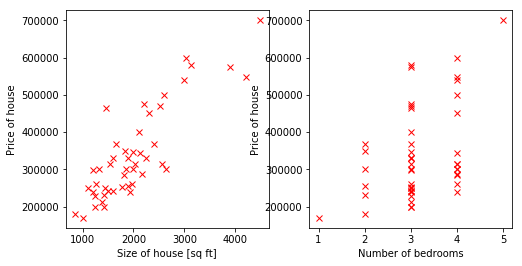

In [324]:
# plot the data
fit, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot(x[:,0], y, 'x', color='r')
ax[0].set_xlabel(r'Size of house [sq ft]')
ax[0].set_ylabel(r'Price of house')

ax[1].plot(x[:,1], y, 'x', color='r')
ax[1].set_xlabel(r'Number of bedrooms')
ax[1].set_ylabel(r'Price of house')

In [325]:
def featureNormalize(X):
    
    # compute mean and standard deviation
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [326]:
# normalize features
X, mu, sigma = featureNormalize(x)

# Add intercept term to X
X = np.hstack((np.ones((X.shape[0],1)), X))

## 3.2 Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged. 

You should complete the code in computeCostMulti and gradientDescentMulti to implement the cost function and gradient descent for linear regression with
multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too. Make sure your code supports any number of features and is well-vectorized.
You can use 'size(X, 2)' to find out how many features are present in the dataset.

In [327]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    return gradientDescent(X, y, theta, alpha, num_iters)

Running gradient descent ...

Theta computed from gradient descent: 

[[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]]




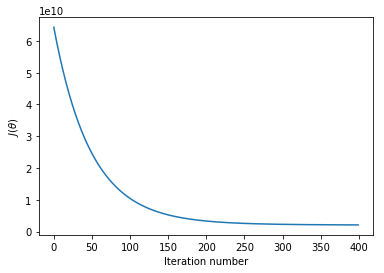

In [328]:
print('Running gradient descent ...\n');

# Choose some alpha value
alpha = 0.01;
num_iters = 400;

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1));
(theta, J_history) = gradientDescentMulti(X, y, theta, alpha, num_iters);

# Plot the convergence graph
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$')

# Display gradient descent's result
print('Theta computed from gradient descent: \n');
print(theta);
print('\n');

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

Using the best learning rate that you found, run gradient descent until convergence to find the final values of $\theta$. Next, use this value of $\theta$ to predict the price of a house with 1650 square feet and 3 bedrooms. You will use value later to check your implementation of the normal equations. Don't forget to normalize your features when you make this prediction!

In [329]:
# Estimate the price of a 1650 sq-ft, 3 br house

vals = (np.array([1650, 3]) - mu) / sigma
vals = np.column_stack((np.ones([1]), vals))

predict = np.dot(vals, theta)
print('A 1650 sq-ft 3 br house will cost $%6.2f' % predict)


A 1650 sq-ft 3 br house will cost $289221.55


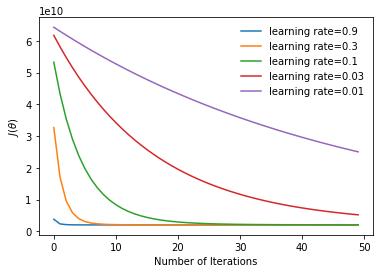

In [330]:
alphas = [0.9, 0.3, 0.1, 0.03, 0.01]
for alpha in alphas:
    theta = np.zeros((3, 1));
    theta, J_history = gradientDescentMulti(X, y, theta, alpha, 50)
    plt.plot(J_history, label='learning rate={0}'.format(alpha))

plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'Number of Iterations')
plt.legend(loc='best', frameon=False)

## 3.3 Normal Equations
In the lecture videos, you learned that the closed-form solution to linear regression is\

$$\theta = (X^TX)^{-1}X^Ty^{\rightarrow}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no loop until convergence like in gradient descent.

Complete the code in normalEqn to use the formula above to calculate $\theta$. Remember that while you don't need to scale your features, we still need to add a column of 1's to the X matrix to have an intercept term ($\theta_0$).

Optional (ungraded) exercise: Now, once you have found $\theta$ using this method, use it to make a price prediction for a 1650-square-foot house with 3 bedrooms. You should find that gives the same predicted price as the value you obtained using the model fit with gradient descent (in Section 3.2.1).

In [331]:
def normalEqn(X, y):
    
    inv_term = np.linalg.inv(np.dot(X.T, X))
    theta = np.dot(inv_term, np.dot(X.T, y))
    
    return theta

In [332]:
# re-compute X with out normalization
X = np.column_stack((np.ones((x.shape[0],1)), x))

# get solution with normal equation
theta_norm = normalEqn(X, y)

# Estimate the price of a 1650 sq-ft, 3 br house
vals = np.matrix([1650, 3])
vals = np.column_stack((np.ones([1]), vals))

# this is the same answer as above if run for more iterations
predict = np.dot(vals, theta_norm)
print('A 1650 sq-ft 3 br house will cost $%6.2f' % predict)

A 1650 sq-ft 3 br house will cost $293081.46
